In [2]:
import numpy as np
import tensorflow as tf
import pickle
import awkward as ak

import sys
sys.path.append("..")
from make_plots import *

2024-03-19 15:12:04.970209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-19 15:12:04.970335: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
save_plot = False
save_as = "asd;lfkj"
testing_ds = "trained_models/Mar19_classification"
testing_data = "/data_ceph/tost/ds_inputs/Mar19_classification/testing.pkl"

In [4]:
# open the classifier
classifier = tf.keras.models.load_model(testing_ds)


# open the training data dictionary, and apply padding
with open(testing_data, 'rb') as file:
    testing = pickle.load(file)

# reduce size of the background due to limit stats on signal
testing['background']['input'] = testing['background']['input'][:5000]
testing['background']['class'] = testing['background']['class'][:5000]

deepset_dict = {}

for dataset in ['signal', 'background']:
    deepset_dict[dataset] = {}
    deepset_dict[dataset]['input'] = tf.keras.preprocessing.sequence.pad_sequences(
                                        testing[dataset]['input'],
                                        dtype='float32',
                                        padding='post',
                                        maxlen=10)
        
deepset_input = np.concatenate((deepset_dict['signal']['input'], deepset_dict['background']['input']))
truth = np.concatenate((testing['signal']['class'], testing['background']['class']))
        

deepset_input = tf.constant(deepset_input).numpy()

2024-03-19 15:12:13.844389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-19 15:12:13.844461: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-19 15:12:13.844493: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2024-03-19 15:12:13.844859: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
deepset_output = classifier.predict(deepset_input)

In [6]:
scores = deepset_output[:,1]
truth = truth[:,1]

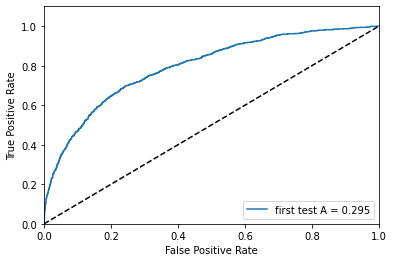

In [14]:
plot_roc({'first test': {'scores': scores, 'truth': truth}})

In [13]:
import importlib
import make_plots
importlib.reload(make_plots)



<module 'make_plots' from '/code/tost/deepsets-for-fcnc/events/../make_plots.py'>